In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test ,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
y_train[0]

9

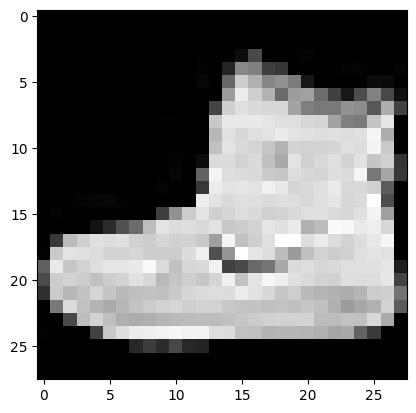

In [8]:
plt.imshow(x_train[0], plt.gray())
plt.show()

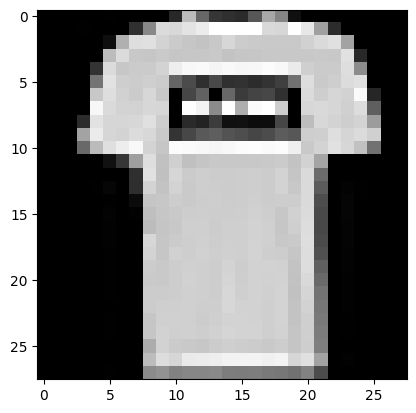

In [11]:
plt.imshow(x_train[1], plt.gray())
plt.show()

### Pre-processing

In [14]:
np.max(x_train), np.min(x_train)

(255, 0)

In [15]:
x_train = x_train / 255
x_test = x_test / 255

In [16]:
x_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Model Definition

dense layers - general deep learning model

In [20]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(units= 256, activation= 'relu'))
model.add(keras.layers.Dense(units= 256, activation= 'relu'))
model.add(keras.layers.Dense(units= 256, activation= 'relu'))
model.add(keras.layers.Dense(units= 256, activation= 'relu'))
model.add(keras.layers.Dense(units= 10, activation= 'softmax'))

In [22]:
model.compile(optimizer= tf.optimizers.Adam(), loss=  tf.losses.sparse_categorical_crossentropy,  metrics= ['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 400906 (1.53 MB)
Trainable params: 40090

In [24]:
hist1 = model.fit(x_train, y_train, epochs= 500, batch_size= 512, validation_data = [x_train, y_train])

Epoch 1/500
118/118 [==============================] - 6s 18ms/step - loss: 0.6278 - accuracy: 0.7789 - val_loss: 0.4989 - val_accuracy: 0.8199
Epoch 2/500
118/118 [==============================] - 1s 10ms/step - loss: 0.3926 - accuracy: 0.8589 - val_loss: 0.3679 - val_accuracy: 0.8666
Epoch 3/500
118/118 [==============================] - 1s 10ms/step - loss: 0.3410 - accuracy: 0.8755 - val_loss: 0.3396 - val_accuracy: 0.8768
Epoch 4/500
118/118 [==============================] - 1s 7ms/step - loss: 0.3159 - accuracy: 0.8832 - val_loss: 0.3503 - val_accuracy: 0.8644
Epoch 5/500
118/118 [==============================] - 1s 8ms/step - loss: 0.2926 - accuracy: 0.8920 - val_loss: 0.2791 - val_accuracy: 0.8970
Epoch 6/500
118/118 [==============================] - 1s 10ms/step - loss: 0.2733 - accuracy: 0.8979 - val_loss: 0.2724 - val_accuracy: 0.8972
Epoch 7/500
118/118 [==============================] - 1s 10ms/step - loss: 0.2611 - accuracy: 0.9023 - val_loss: 0.2520 - val_accuracy: 0

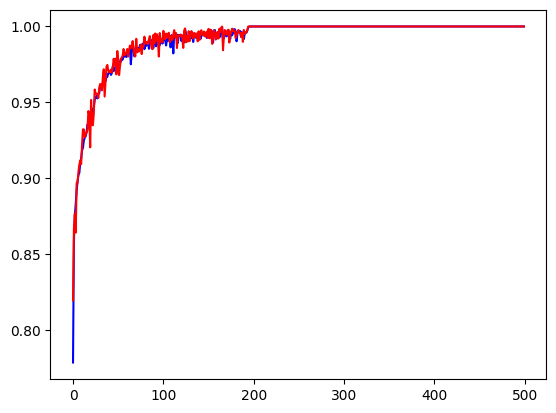

In [36]:
plt.plot(hist1.history['accuracy'], color= 'b')
plt.plot(hist1.history['val_accuracy'], color= 'r')
plt.show()

### CNN Models

In [28]:
cnn_model = keras.Sequential()
cnn_model.add(keras.layers.Conv2D(64, (5,5), input_shape=(28, 28, 1), activation ='relu', padding= 'same'))
cnn_model.add(keras.layers.MaxPool2D())
cnn_model.add(keras.layers.Conv2D(128, (3,3), activation ='relu',))
cnn_model.add(keras.layers.AvgPool2D())
cnn_model.add(keras.layers.Conv2D(128, (3,3), activation ='relu',))
cnn_model.add(keras.layers.MaxPool2D())

cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(units = 128,  activation ='relu'))
cnn_model.add(keras.layers.Dense(units = 128,  activation ='relu'))
cnn_model.add(keras.layers.Dense(units = 10,  activation ='softmax'))

In [32]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 average_pooling2d_1 (Avera  (None, 6, 6, 128)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 2, 2, 128)        

In [33]:
cnn_model.compile(optimizer= tf.optimizers.Adam(), loss=  tf.losses.sparse_categorical_crossentropy,  metrics= ['accuracy'])

In [35]:
cnn_hist  = cnn_model.fit(x_train, y_train, epochs= 500, batch_size= 512, validation_data = [x_train, y_train])

Epoch 1/500
118/118 [==============================] - 9s 36ms/step - loss: 0.8613 - accuracy: 0.6794 - val_loss: 0.5446 - val_accuracy: 0.8027
Epoch 2/500
118/118 [==============================] - 4s 30ms/step - loss: 0.4914 - accuracy: 0.8196 - val_loss: 0.4435 - val_accuracy: 0.8438
Epoch 3/500
118/118 [==============================] - 3s 26ms/step - loss: 0.4040 - accuracy: 0.8539 - val_loss: 0.4131 - val_accuracy: 0.8457
Epoch 4/500
118/118 [==============================] - 4s 31ms/step - loss: 0.3653 - accuracy: 0.8683 - val_loss: 0.3350 - val_accuracy: 0.8801
Epoch 5/500
118/118 [==============================] - 5s 39ms/step - loss: 0.3297 - accuracy: 0.8815 - val_loss: 0.3343 - val_accuracy: 0.8796
Epoch 6/500
118/118 [==============================] - 4s 33ms/step - loss: 0.3006 - accuracy: 0.8902 - val_loss: 0.2787 - val_accuracy: 0.8982
Epoch 7/500
118/118 [==============================] - 5s 39ms/step - loss: 0.2866 - accuracy: 0.8965 - val_loss: 0.2965 - val_accuracy:

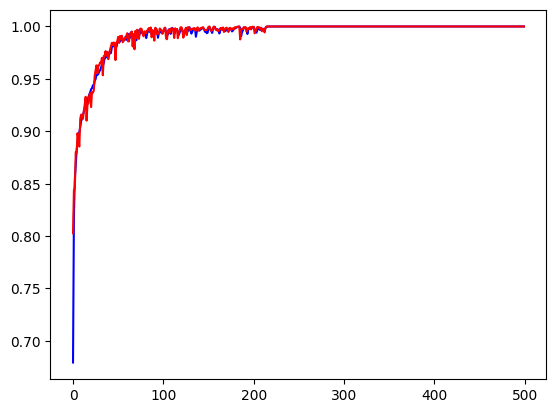

In [37]:
plt.plot(cnn_hist.history['accuracy'], color= 'b')
plt.plot(cnn_hist.history['val_accuracy'], color= 'r')
plt.show()